In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

import math
from math import fabs

import scipy.ndimage
from scipy import misc

In [0]:
ilosc_katow = 1 #kolumny
ilosc_emiterow = 21 #wiersze
#l = 350 #odleglosc od detektora nr 1 do ostatniego detektora

In [0]:
image = imageio.imread('/content/drive/My Drive/Colab Notebooks/Zdjecia/Kolo.jpg')

In [4]:
n_y = len(image)
n_x = len(image[0])

n_x, n_y

(400, 400)

In [0]:
# poczatkowa pozycja emitera
em_y0 = n_y - 1 #0
em_x0 = int(n_x/2)

In [32]:
# poczatkowa pozycja pierwszego detektora jeśli jest ich nieparzyście
det_x0 = em_x0
det_y0 = 0 #n_y - 1

(em_x0, em_y0), (det_x0, det_y0)

((200, 399), (200, 0))

In [0]:
def zapalPiksel(x,y, kolor="czarny"):
    if kolor=="czarny":
        wartosc = 255
    elif kolor=="bialy":
        wartosc=0
        
    #image_m[x][y] = wartosc
    try:
      image[x][y] = [wartosc, wartosc, wartosc]
    except:
      pass

In [0]:
### Ogólny algorytm Bresenhama
###############
def algBresenhama(nr_emitera, nr_kata, x1,y1,x2,y2):
#K01: 	Jeżeli x1 ≤ x2, to kx ← 1, inaczej kx ← -1 	; określamy krok X od x1 do x2
    if(x1<=x2):
        kx = 1
    else:
        kx = -1
#K02: 	Jeżeli y1 ≤ y2, to ky ← 1, inaczej ky ← -1 	; określamy krok Y od y1 do y2
    if(y1<=y2):
        ky = 1
    else:
        ky = -1
#K03: 	dx ← |x2 - x1| 	; odległość pomiędzy x1 i x2
    dx = math.fabs(x2 - x1)
#K04: 	dy ← |y2 - y1| 	; odległość pomiędzy y1 i y2
    dy = math.fabs(y2 - y1)
#K05: 	Zapal piksel x1,y1 	; pierwszy piksel odcinka
    zapalPiksel(x1, y1)
#K06: 	Jeżeli dx < dy, idź do kroku K16 	; dla kątów > 45° wykonujemy wersję algorytmu z przestawionymi współrzędnymi
    if(dx < dy):
        #K16: 	e ← dy / 2 	; wersja algorytmu Bresenhama ze zamienionymi współrzędnymi x i y
        e = dy/2
        for i in range(int(dy)):
#K17: 	Powtarzaj dy razy kroki K18...K23 
#K18: 	    y1 ← y1 + ky
            y1 = y1 + ky
#K19: 	    e ← e - dx 
            e = e - dx
#K20: 	    Jeżeli e ≥ 0, idź do kroku K23 	 
            if(e>=0):
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)
            else:
#K21: 	    x1 ← x1 + kx 	 
                x1 = x1 + kx
#K22: 	    e ← e + dy 	 
                e = e + dy
#K23: 	    Zapal piksel x1,y1 	 
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y2)
    else:
#K07: 	e ← dx / 2 	; obliczamy wartość początkową wyrażenia błędu
        e = (dx/2)
#K08: 	Powtarzaj dx razy kroki K09...K14 	; rysujemy pozostałe piksele w pętli
        for i in range(int(dx)):
#K09: 	    x1 ← x1 + kx 	; przesuwamy się w odpowiednią stronę w kierunku szybkim
            x1 = x1 + kx
#K10: 	    e ← e - dy 	; obliczamy wyrażenie błędu
            e = e - dy
#K11: 	    Jeżeli e ≥ 0, idź do kroku K14 	; jeśli wyrażenie błędu jest nieujemne, pomijamy ruch w kierunku wolnym
            if(e>0):
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)
            else:
#K12: 	    y1 ← y1 + ky 	; przesuwamy się w odpowiednią stronę w kierunku wolnym
                y1 = y1 + ky
#K13: 	    e ← e + dx 	; obliczamy nowe wyrażenie błędu
                e = e + dx
#K14: 	    Zapal piksel x1.y1 	; kolejny piksel odcinka
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)

In [0]:
algBresenhama(1, 1, em_y0, em_x0, det_y0, det_x0) # ___, ____, y1, x1, y2, x2

In [0]:
#for x in range(len(image)):
 # for y in range(len(image[x])):
  #  image[x][y] = image[x][y][0]

In [0]:
def arrayToImage(arr, form='RGB'):
    return Image.fromarray(arr, form)
    #img.save('my.png')
    #img.show()

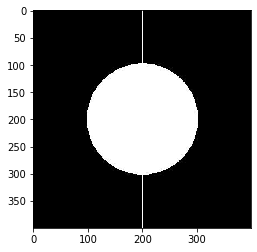

In [12]:
plt.imshow(image)

In [13]:
R = 0.5 * (math.sqrt(n_x**2 + n_y**2))
R

282.842712474619

In [14]:
alfa = math.pi/14
x = math.sin(2*alfa) * R
x

122.7208536706401

In [0]:
def oblicz_polozenie_det_centralnego():
  det_x0 = n_x - em_x0 - 1
  det_y0 = n_y - em_y0 - 1
  return det_x0, det_y0

In [0]:
### pozniej to lepiej zapisa -> podmienianie zmiennych, mniej kodu
def odlicz_dlugosc_od_det_centralnego_gdy_w_centrum(kat):
  # R = 0.5 * (math.sqrt(n_x**2 + n_y**2))
  if em_y0==0 or em_y0 == (n_y - 1):
    linia_nizej = math.sin(2*kat)*R
    y = math.sqrt(R**2 - linia_nizej**2)
    try: 
      print(det_x0 *(linia_nizej/y))
      return det_x0 *(linia_nizej/y)
    except:
      print(linia_nizej)
      return linia_nizej
  elif em_x0==0 or em_x0 == (n_x - 1):
    linia_nizej = math.sin(2*kat)*R
    y = math.sqrt(R**2 - linia_nizej**2)
    try: 
      print(det_y0 *(linia_nizej/y))
      return det_y0 *(linia_nizej/y)
    except:
      print(linia_nizej)
      return linia_nizej

In [0]:
def odlicz_dlugosc_od_det_centralnego_gdy_w_wierzcholku(kat):
  print(2*R*math.sin(kat)/math.sin((3/4)*math.pi - kat))
  return 2*R*math.sin(kat)/math.sin((3/4)*math.pi - kat)

In [0]:
def odlicz_dlugosc_od_det_centralnego_gdy_pomiedzy(kat):
  TODO

In [0]:
def oblicz_polozenie_det2_gdy_w_centrum(kat, w_strone="prawo"):
  p = n_x/2
  #a = 2*R*math.sin(math.pi - kat)
  #b = 2*R*math.sin(kat)
  a = p / math.sin(kat)
  x1 = math.sqrt(a**2 - p**2)
  x2 = 2*R - x1
  
  suma_x = x1 + x2 # jest to długość równa dł. wysokości boku + 2 x 'dodatki' (odległości miedzy bokiem a okręgiem)
  dodatki2 = suma_x - n_y
  dodatek = dodatki2/2
  #print(dodatek)
  polozenie_w_y = x1 - dodatek
  if w_strone=="prawo":
    dx2 = n_x-1 
    dy2 = polozenie_w_y
  elif w_strone=="lewo":
    dx2 = 0
    dy2 = polozenie_w_y
  m = dodatek + polozenie_w_y
  rozstaw = dodatek * p / m
  if w_strone=="prawo":
    #print("sss")
    #print(rozstaw)
    dx1 = p + rozstaw 
    dy1 = 0
  elif w_strone=="lewo":
    dx1 = p - rozstaw
    dy1 = 0

  return int(dx1), int(dy1), int(dx2), int(dy2)


In [0]:
def oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="prawo"):
  odl = odlicz_dlugosc_od_det_centralnego_gdy_w_centrum(kat)
  if em_y0==0 or em_y0 == (n_y - 1):
    if w_strone=="prawo":
      w = det_x0 + odl
      if w <= n_x:
        dx2 = w
        dy2 = det_y0
      else:
        #print("dd")
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "prawo")
    elif w_strone=="lewo":
      w = det_x0 - odl
      if w >= 0:
        dx2 = w
        dy2 = det_y0
      else:
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "lewo")
    dodatki2 = 2*R - n_y
    dodatek = dodatki2 / 2
    k = dodatek + n_y
    x = dodatek * odl / k

    if w_strone=="prawo":
      dx1 = n_x/2 + x
    elif w_strone=="lewo":
      dx1 = n_x/2 - x
    dy1 = em_y0

    return int(dx1), int(dy1), int(dx2), int(dy2)
#########
  elif em_x0==0 or em_x0 == (n_x - 1):
    if w_strone=="prawo":
      w = det_y0 + odl
      if w <= n_y:
        dx2 = det_x0
        dy2 = w
      else:
        #print("dd")
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "prawo")
    elif w_strone=="lewo":
      w = det_y0 - odl
      if w >= 0:
        dx2 = det_x0
        dy2 = w
      else:
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "lewo")
    dodatki2 = 2*R - n_y
    dodatek = dodatki2 / 2
    k = dodatek + n_y
    x = dodatek * odl / k

    if w_strone=="prawo":
      dy1 = n_y/2 + x
    elif w_strone=="lewo":
      dy1 = n_y/2 - x
    dx1 = em_x0

    return int(dx1), int(dy1), int(dx2), int(dy2)

## Próba rozstawienia detektorów dla podanej rozwartości kąta

In [0]:
kat_rozw = 0.3 * math.pi
l = R * kat_rozw

18.811038404677127
18.811038404677127
37.96128024149478
37.96128024149478
57.814844489651364
57.814844489651364
78.78967375074652
78.78967375074652
101.3955644493913
101.3955644493913
126.28924021128547
126.28924021128547
154.36022269887303
154.36022269887303
186.873438657681
186.873438657681
225.72119250182573
225.72119250182573


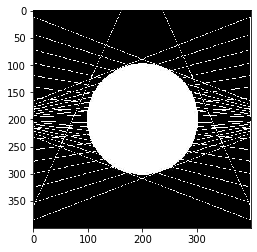

In [56]:
#### gdy nieparzysta ilosc detektorów:
# narysuj prosta linie przechodzaca przez srodek
# kazda z czesci (lewa i prawa) podzielona na (n-1)/2 czesci
ilosc_czesci_kata_dla_obu_stron = (ilosc_emiterow-1)
# czyli pojedynczy kat wyniesie
kat_p = (kat_rozw/ilosc_czesci_kata_dla_obu_stron)
kat = kat_p
it = int((ilosc_emiterow-1)/2)
for i in range(1, it):
  dx1, dy1, dx2, dy2 = oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="prawo")
  algBresenhama(1, 1, dy1, dx1, dy2, dx2)
  dx1, dy1, dx2, dy2 = oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="lewo")
  algBresenhama(1, 1, dy1, dx1, dy2, dx2)
  kat = kat + kat_p
plt.imshow(image)

In [0]:
def przesun_emiter(kat):
  if kat == math.pi/2:
    return n_x - 1, int(n_y/2)
  elif kat == math.pi:
    return int(n_x/2), n_y - 1
  elif kat == 3 * math.pi/2:
    return 0, int(n_y/2)
  else:
    x = int(math.tan(kat) * n_y/2)
    pos = int((n_x)/2 + x)
    if(pos <= (n_x - 1)):
      return pos, 0
    else:
      pass

In [55]:
em_x0, em_y0 = przesun_emiter(3 * math.pi/2)
det_x0, det_y0 = oblicz_polozenie_det_centralnego()
em_x0, em_y0, det_x0, det_y0

(0, 200, 399, 199)